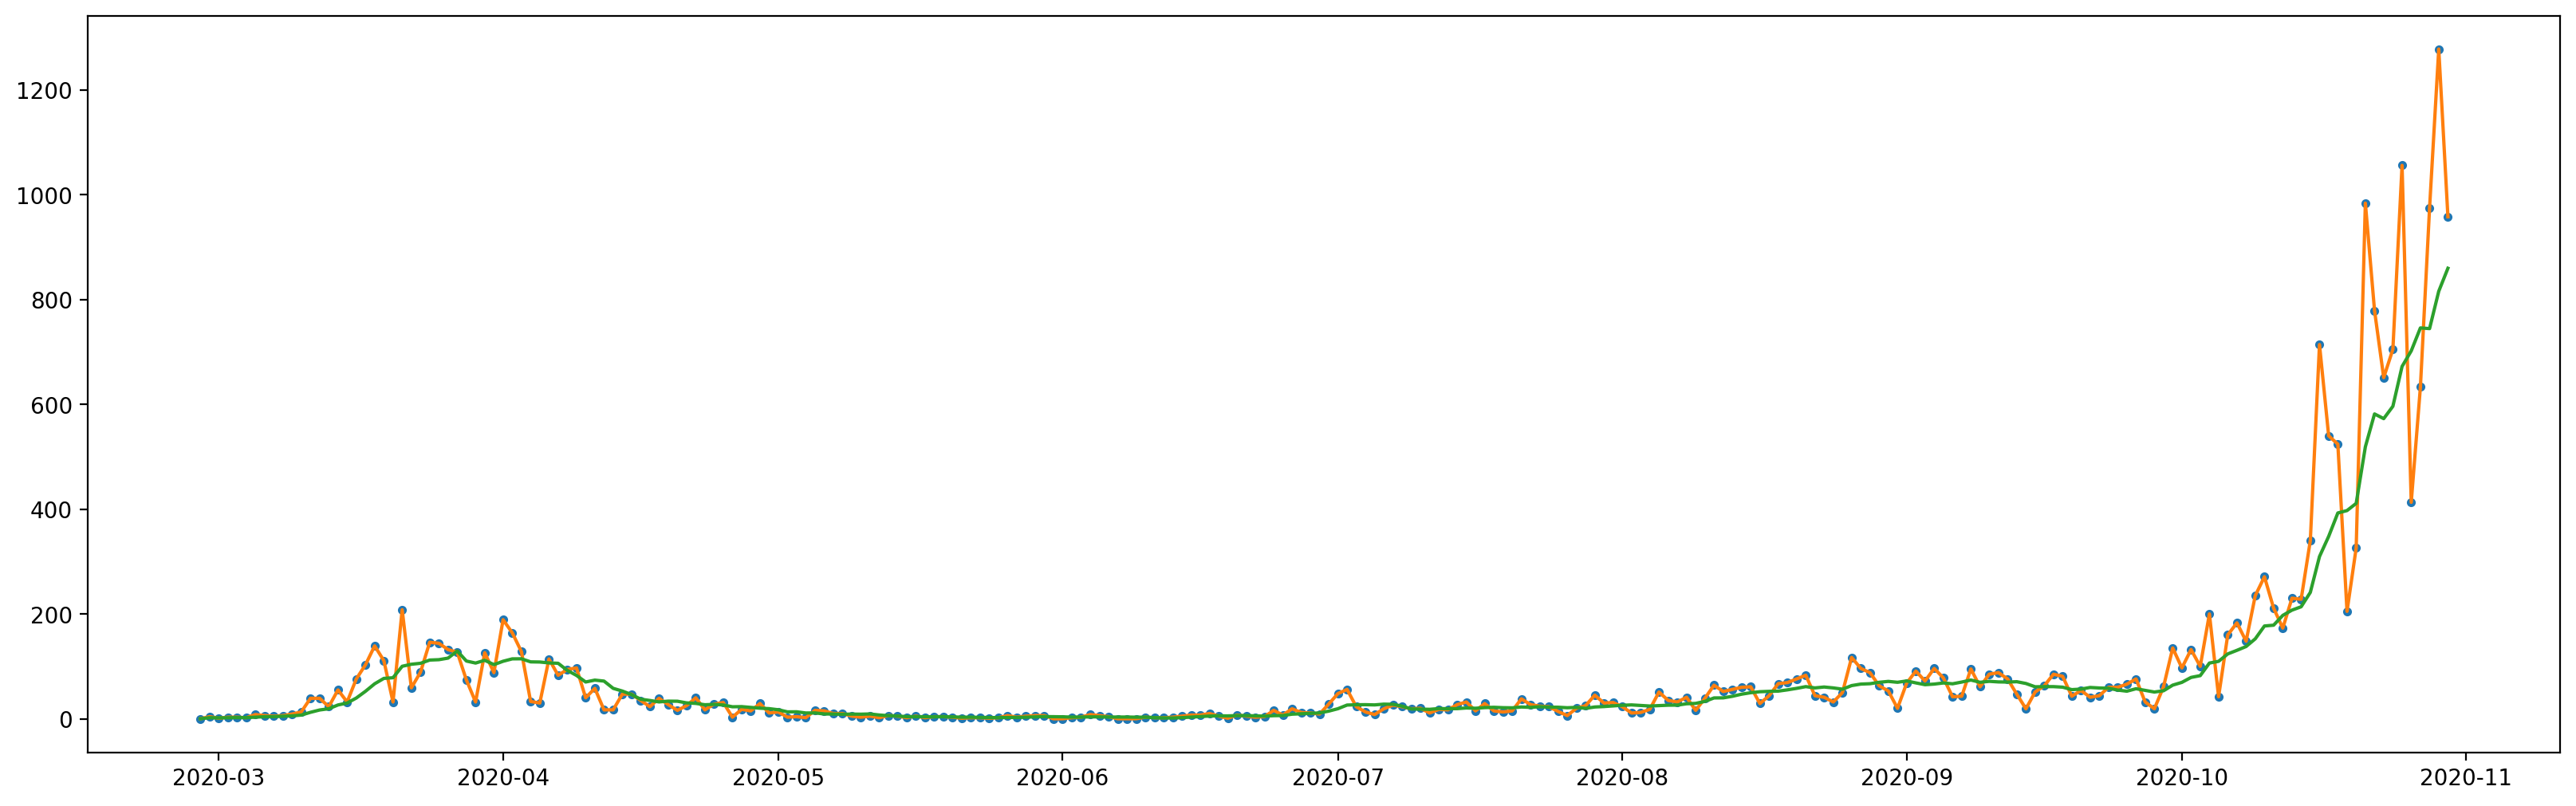

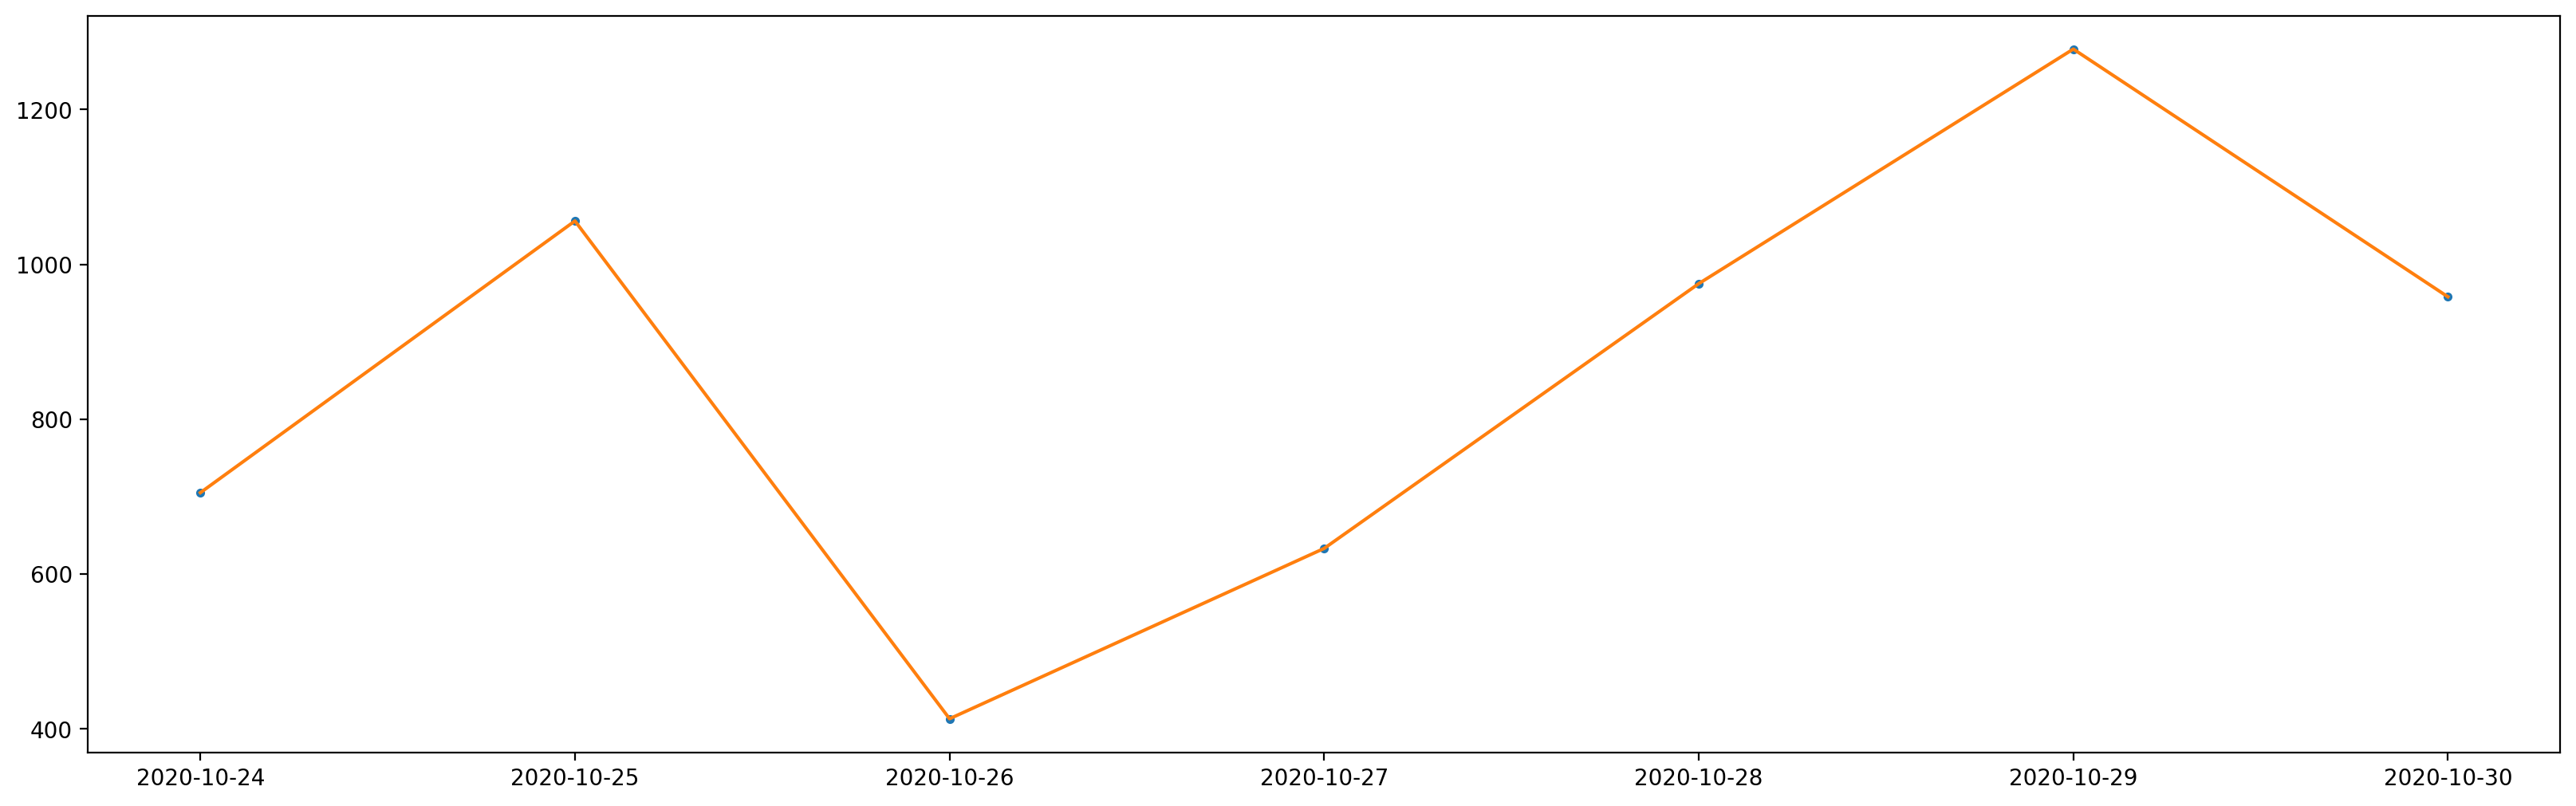

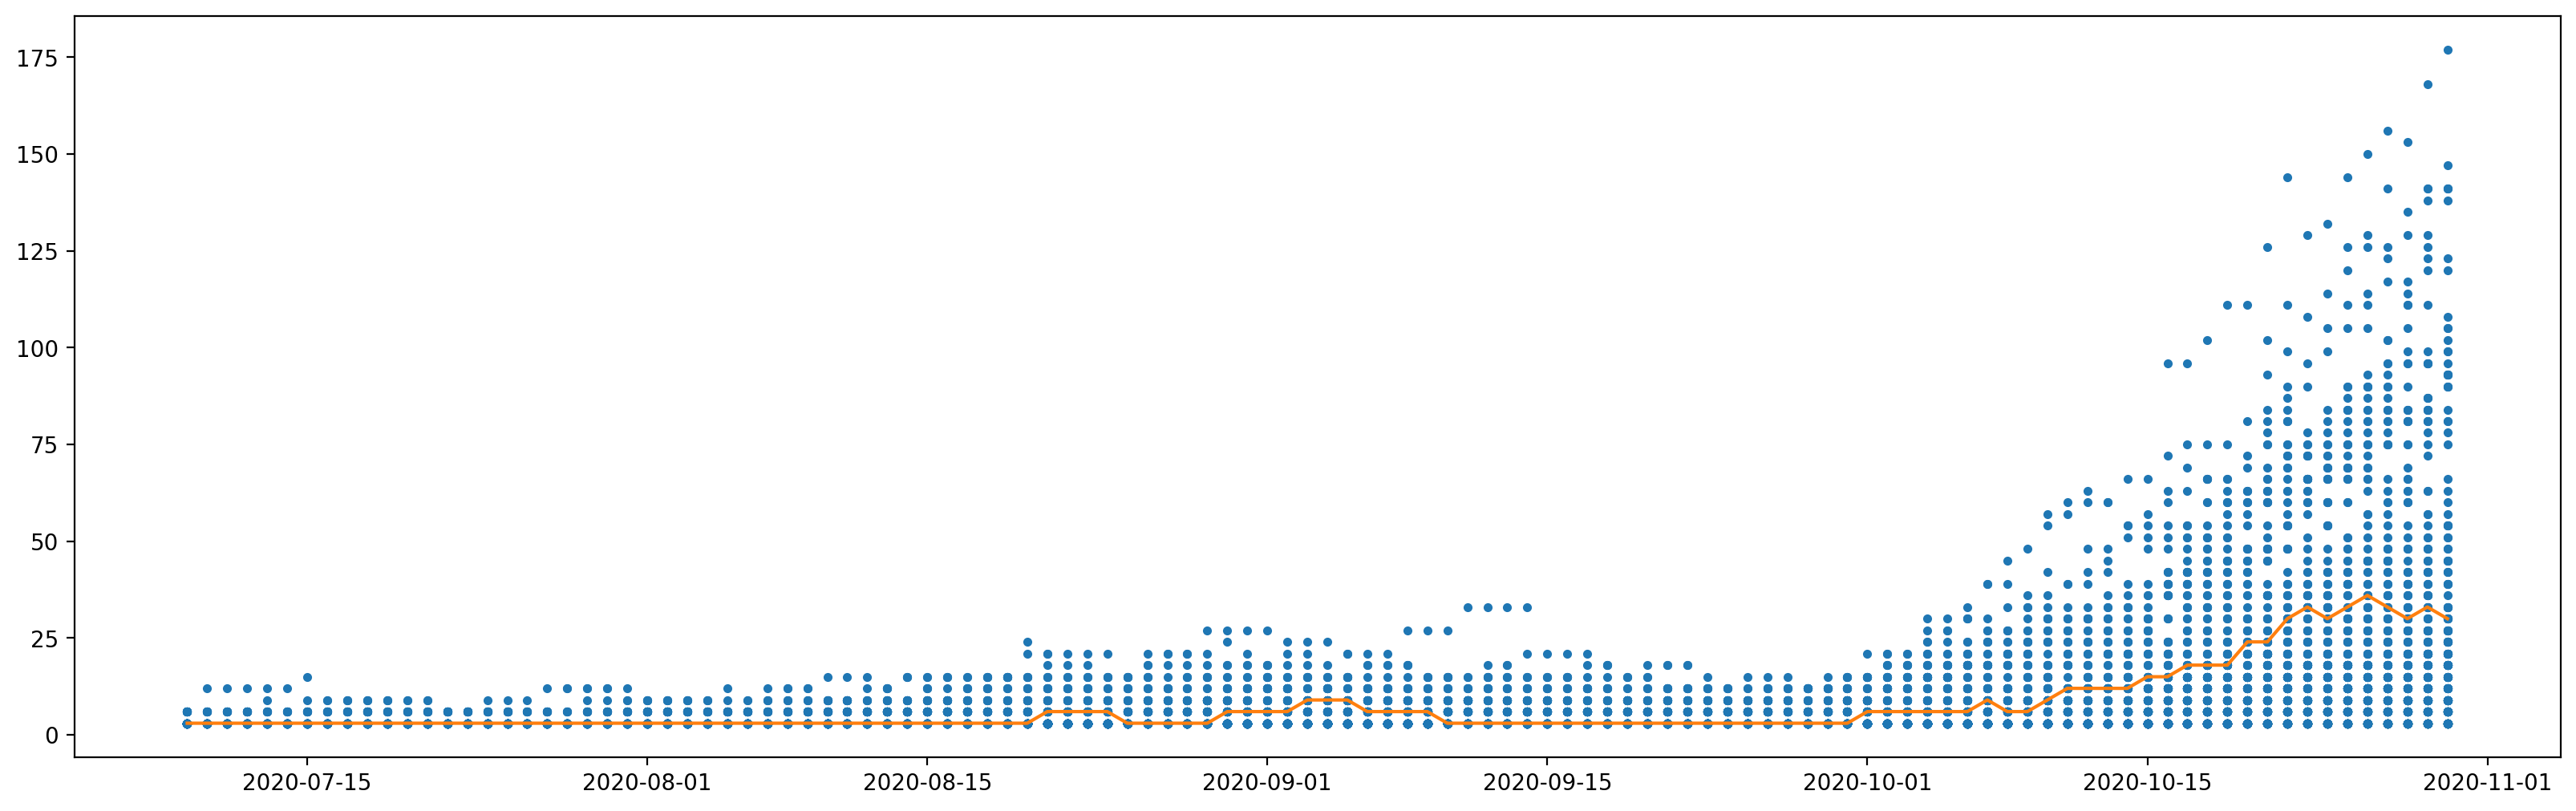

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)
#get the last entry
def sp(u):
   return float(u.split("-")[-1])
#zurichs totals
url = 'https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_ZH_total.csv'
df = pd.read_csv(url, error_bad_lines = False, header=0, index_col=0, parse_dates=True, squeeze=True)
#calculate new cases from cumulated cases
df.insert(3, "new", df['ncumul_conf']-df.shift(periods=1)['ncumul_conf'], True) 
newCases = df[df.columns[[3]]]
#prepare overview
plt.figure(1)
plt.plot(newCases,'.')
plt.plot(newCases,'-')
ma = newCases.rolling('7d').mean()
plt.plot(ma,'-')
#prepare short term view
plt.figure(2)
lastDays=newCases.tail(7)
plt.plot(lastDays,'.')
plt.plot(lastDays,'-')
pyplot.show()
#prepare plz view
plt.figure(3)
urlZhPlz='https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_plz/fallzahlen_kanton_ZH_plz.csv'
smallAreasNew=pd.read_csv(urlZhPlz, error_bad_lines = False, header=0, index_col=1, parse_dates=True, squeeze=True)
smallAreasNew['newconfirmed7'] = smallAreasNew['NewConfCases_7days'].apply(sp)
witikon = smallAreasNew[smallAreasNew.PLZ == "8053"]
smallAreasNew= smallAreasNew[smallAreasNew.columns[[3]]]
witikon=witikon[witikon.columns[[3]]]
plt.plot(smallAreasNew,'.')
plt.plot(witikon,'-')
pyplot.show()